<a href="https://colab.research.google.com/github/Bica-plus-equals/Environmental-Data-Analysis/blob/main/Intercomparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit Testing


In [ ]:
!pip install xarray

import xarray as xr
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

inv = xr.open_dataset('/content/drive/MyDrive/r76nbetEXToc_v2024E.flux.nc')
dgvm_monthly = xr.open_dataset('/content/drive/MyDrive/dgvm_monthly2.nc')
dgvm_annual = xr.open_dataset('/content/drive/MyDrive/dgvm2.nc')


In [ ]:
pip install cartopy

In [ ]:
print(dgvm_annual)


<xarray.Dataset> Size: 85MB
Dimensions:  (time: 41, lat: 360, lon: 720)
Coordinates:
  * time     (time) int64 328B 1980 1981 1982 1983 1984 ... 2017 2018 2019 2020
  * lat      (lat) float64 3kB -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 6kB -180.0 -179.5 -179.0 -178.5 ... 179.0 179.5 180.0
Data variables:
    NEE      (time, lat, lon) float64 85MB ...


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


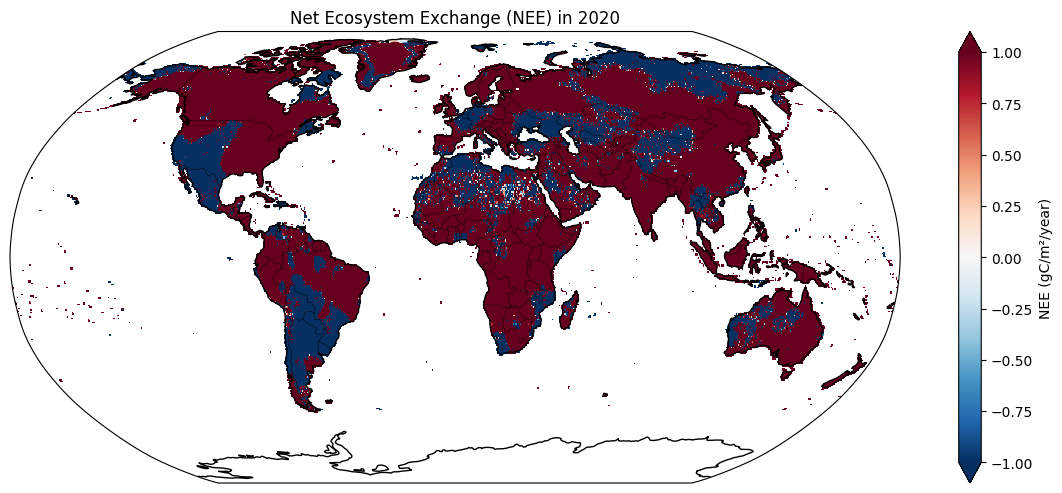

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select NEE at time=2020
nee_2020 = dgvm_annual['NEE'].sel(time=2020)

# Create the plot
plt.figure(figsize=(12, 5))
ax = plt.axes(projection=ccrs.Robinson())
im = nee_2020.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=-1, vmax=1,
    cbar_kwargs={'label': 'NEE (gC/m²/year)'}
)

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.set_title('Net Ecosystem Exchange (NEE) in 2020')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import xarray as xr

#earth radius-based grid cell area from miami github
deg2rad = np.pi /180.0
larea_base = 1.0e6 * (40075.0 / 720.0)**2 #m^2

#Broadcast across lon
lat_weights = np.cos(dgvm_annual['lat'] * deg2rad)
grid_cell_area = lat_weights * larea_base
area_2d = grid_cell_area.broadcast_like(dgvm_annual['NEE'].isel(time=0))

#multiply nee by grid cell area
NEE_times_area = dgvm_annual['NEE'] * area_2d

#Sum over all gridcells to get global totals
NEE_global_annual = NEE_times_area.sum(dim=['lat','lon'])

print(NEE_global_annual/ 1.0e15)


<xarray.DataArray (time: 41)> Size: 328B
array([1.11200332, 2.07841374, 1.51861848, 1.07601254, 2.18925591,
       2.34575346, 2.06968991, 0.69634059, 1.79093164, 2.64726055,
       2.09766478, 1.02455085, 2.76285142, 3.09263646, 1.20761911,
       1.86186809, 3.48248694, 3.15209291, 1.89700826, 3.72292761,
       4.31612693, 2.03800422, 1.74752095, 2.41168446, 3.45184057,
       1.9386677 , 3.12825802, 2.81892463, 4.08918059, 3.0890247 ,
       4.32431745, 3.97782214, 2.40522386, 4.31546661, 3.71360134,
       2.59035586, 3.62284718, 4.48178634, 4.38198656, 3.60484199,
       3.96360159])
Coordinates:
  * time     (time) int64 328B 1980 1981 1982 1983 1984 ... 2017 2018 2019 2020


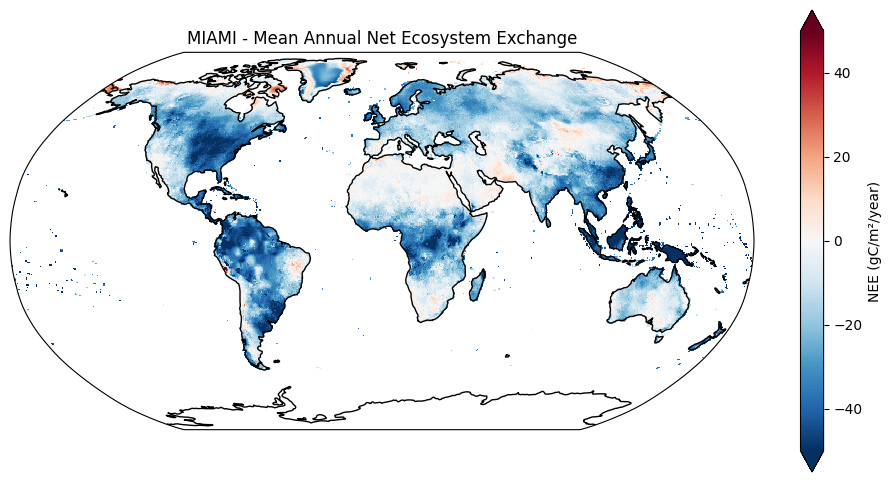

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# nee_mean = dgvm_annual['NEE'].mean(dim='time')  # [lat, lon], units: gC/m²/year
# Step 1: Access the NEE DataArray directly
nee = -dgvm_annual['NEE']  # (time, lat, lon)

# Step 2: Group by year and sum over months → annual NEE
#nee_annual = nee.groupby('time.year').sum(dim='time')  # shape: (year, lat, lon)

# Step 3: Compute multi-year mean
nee_mean = nee.mean(dim='time')  # shape: (lat, lon)

vmin, vmax = np.nanpercentile(nee_mean.values, [2, 98])

fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())
nee_mean.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=-50,
    vmax=50,
    cbar_kwargs={'label': 'NEE (gC/m²/year)'}
)
ax.coastlines()
ax.set_title('MIAMI - Mean Annual Net Ecosystem Exchange')
plt.show()


In [ ]:
print(inv)
print(inv['co2flux_land'])

<xarray.Dataset> Size: 4GB
Dimensions:        (lon: 144, nv: 2, lat: 90, itime: 19724, proc: 6, rt: 3,
                    spec: 1, mtime: 17532, mtime0: 100)
Coordinates:
  * lon            (lon) float32 576B -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
  * lat            (lat) float32 360B -89.0 -87.0 -85.0 -83.0 ... 85.0 87.0 89.0
  * itime          (itime) datetime64[ns] 158kB 1971-01-01 ... 2024-12-31
  * proc           (proc) int32 24B 1 2 3 4 5 6
  * rt             (rt) int32 12B 1 2 3
  * spec           (spec) int32 4B 1
  * mtime          (mtime) datetime64[ns] 140kB 1976-01-01T11:59:59 ... 2023-...
Dimensions without coordinates: nv, mtime0
Data variables: (12/22)
    lon_bounds     (lon, nv) float32 1kB ...
    lat_bounds     (lat, nv) float32 720B ...
    itime_bounds   (itime, nv) datetime64[ns] 316kB ...
    dt             (itime) timedelta64[ns] 158kB ...
    year           (itime) float64 158kB ...
    lproc          (proc) |S20 120B ...
    ...             ...
    myear2

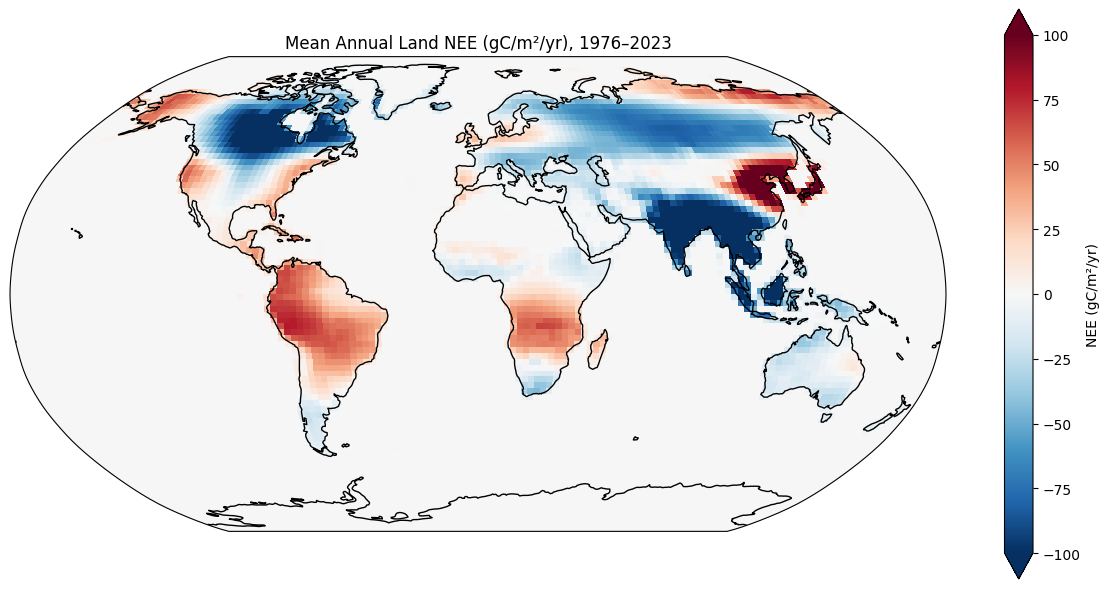

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ds=inv

# Constants
PETA = 1e15  # 1 Pg = 10^15 grams
deg2rad = np.pi / 180.0
earth_radius = 6371000  # meters

# Load dataset if not already
# ds = xr.open_dataset("your_file.nc")

# Step 1: Convert flux to gC/year (from PgC/year)
flux_gC = ds['co2flux_land'] * PETA  # Now in gC/yr

# Step 2: Compute grid cell area (approximate, using lat/lon spacing)
# Get lat/lon
lat = ds['lat']
lon = ds['lon']

# Calculate area weights based on latitude (same area along longitude at each lat)
# Assumes regular 2° x 2.5° grid; adjust if necessary
dlat = np.abs(lat[1] - lat[0]).item()
dlon = np.abs(lon[1] - lon[0]).item()

# Convert degrees to radians
lat_rad = lat * deg2rad
area = (earth_radius**2) * deg2rad * dlat * deg2rad * dlon * np.cos(lat_rad)  # [lat]

# Broadcast to [lat, lon]
area_2d = area.broadcast_like(flux_gC.isel(mtime=0))

# Step 3: Normalize flux per m²: gC/yr ÷ m² → gC/m²/yr
flux_per_m2 = flux_gC / area_2d  # shape: [mtime, lat, lon]

# Step 4: Group by year and take annual mean
annual_flux = flux_per_m2.groupby(ds['myear2']).mean(dim='mtime')  # [year, lat, lon]

# Step 5: Take mean across years
mean_annual_flux = annual_flux.mean(dim='myear2')  # [lat, lon]

# Step 6: Plot
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())
mean_annual_flux.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=-100, vmax=100,  # Adjust this based on your data range
    cbar_kwargs={'label': 'NEE (gC/m²/yr)'}
)
ax.coastlines()
ax.set_title('Mean Annual Land NEE (gC/m²/yr), 1976–2023')
plt.tight_layout()
plt.show()


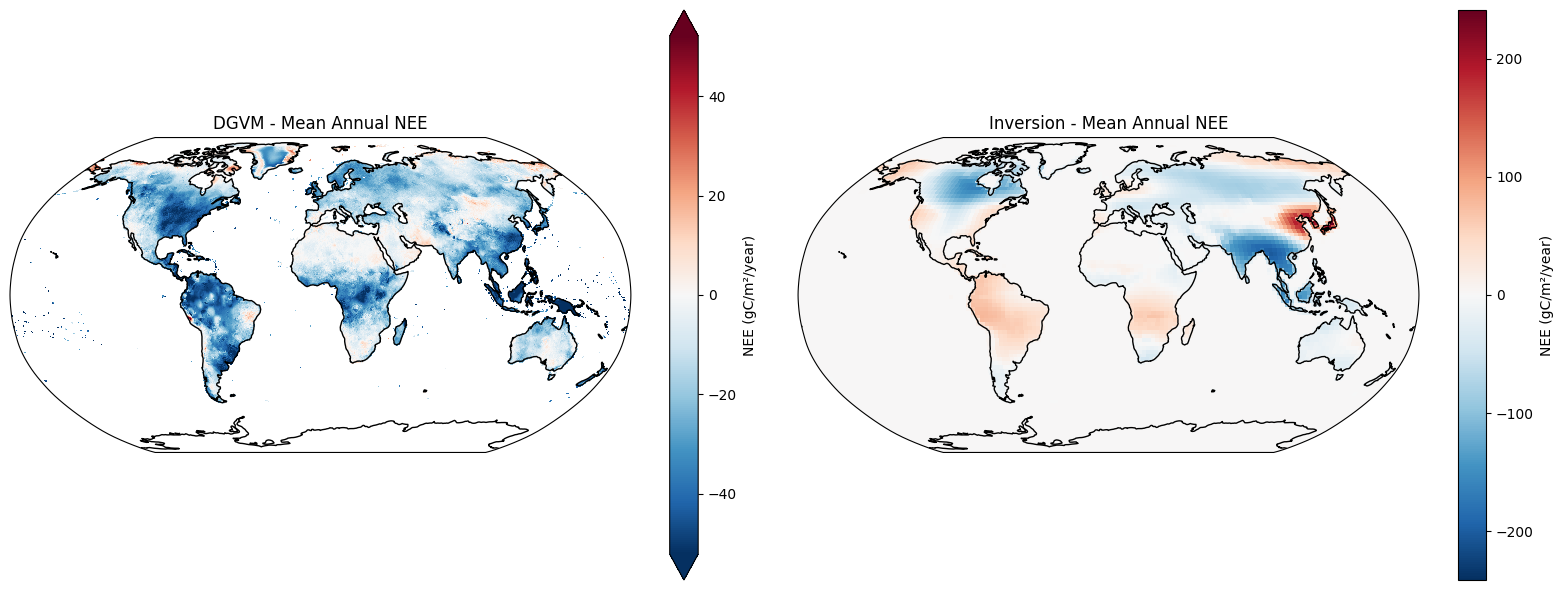

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

nee_mean_inv = mean_annual_flux
nee_mean_dgvm = nee_mean
 #Compute vmin/vmax only from DGVM data (2nd–98th percentiles)
vmin_dgvm, vmax_dgvm = np.nanpercentile(nee_mean_dgvm.values, [2, 98])

# Create figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6),
                        subplot_kw={'projection': ccrs.Robinson()})

# DGVM plot (capped)
p1 = nee_mean_dgvm.plot(
    ax=axs[0],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin_dgvm,
    vmax=-vmin_dgvm,
    cbar_kwargs={'label':'NEE (gC/m²/year)'}
)
axs[0].set_title('DGVM - Mean Annual NEE')
axs[0].coastlines()

# Inversion plot (uncapped)
p2 = nee_mean_inv.plot(
    ax=axs[1],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    add_colorbar=True,
    cbar_kwargs={'label': 'NEE (gC/m²/year)'}
)
axs[1].set_title('Inversion - Mean Annual NEE')
axs[1].coastlines()

plt.tight_layout()
plt.show()


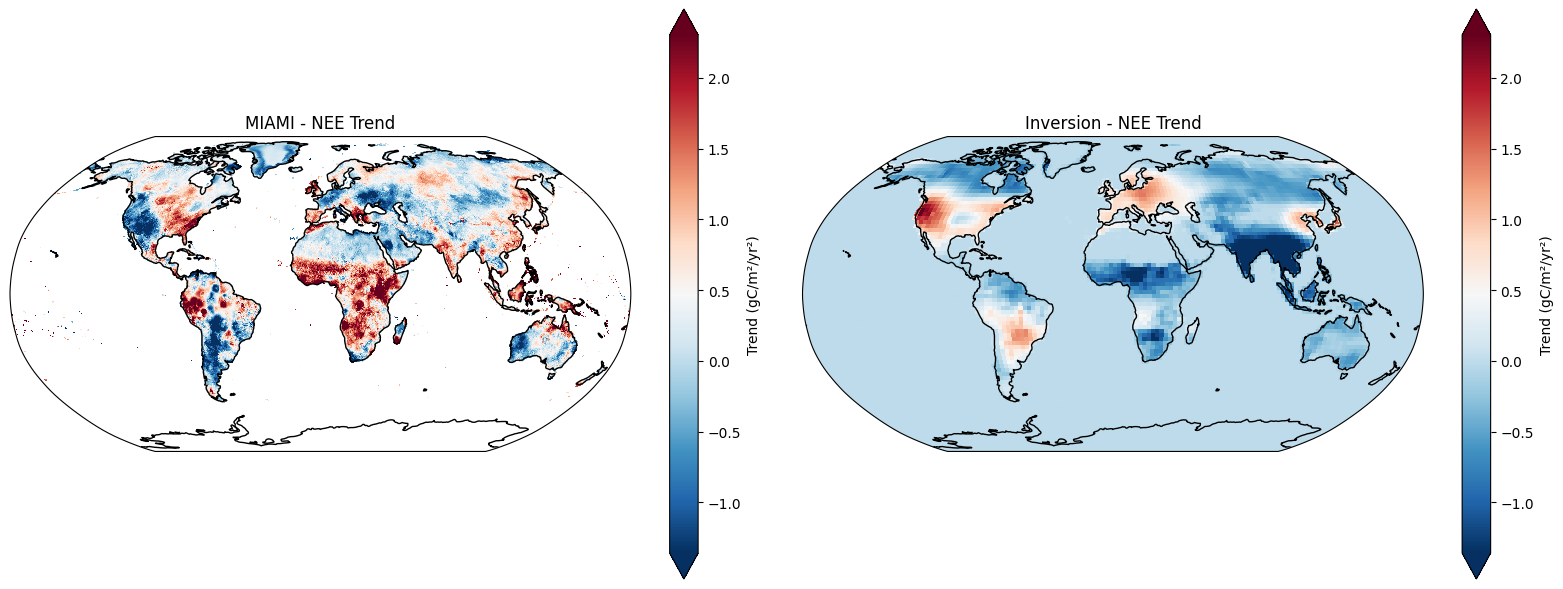

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming these DataArrays exist:
# nee_annual_dgvm: dims = ['myear2', 'lat', 'lon']  (annual DGVM fluxes)
# nee_annual_inv: dims = ['myear2', 'lat', 'lon']   (annual inversion fluxes)

nee_annual_dgvm = -nee_mean
nee_annual_inv = annual_flux

# Convert year coordinate to numeric for polyfit
years = nee_annual_inv['myear2'].values

# Calculate linear trend per grid cell:
trend_dgvm = dgvm_annual['NEE'].polyfit(dim='time', deg=1)['polyfit_coefficients'].sel(degree=1)
trend_inv = annual_flux.polyfit(dim='myear2', deg=1)['polyfit_coefficients'].sel(degree=1)

# Compute shared vmin, vmax based on percentiles of trends for better color scaling
combined_trends = np.concatenate([trend_dgvm.values.flatten(), trend_inv.values.flatten()])
vmin, vmax = np.nanpercentile(combined_trends, [2, 98])

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6),
                        subplot_kw={'projection': ccrs.Robinson()})

# DGVM trend plot
p1 = trend_dgvm.plot(
    ax=axs[0],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={'label': 'Trend (gC/m²/yr²)'}
)
axs[0].set_title('MIAMI - NEE Trend')

# Inversion trend plot
p2 = trend_inv.plot(
    ax=axs[1],
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=vmin,
    vmax=vmax,
    cbar_kwargs={'label': 'Trend (gC/m²/yr²)'}
)
axs[1].set_title('Inversion - NEE Trend')

for ax in axs:
    ax.coastlines()

plt.tight_layout()
plt.show()


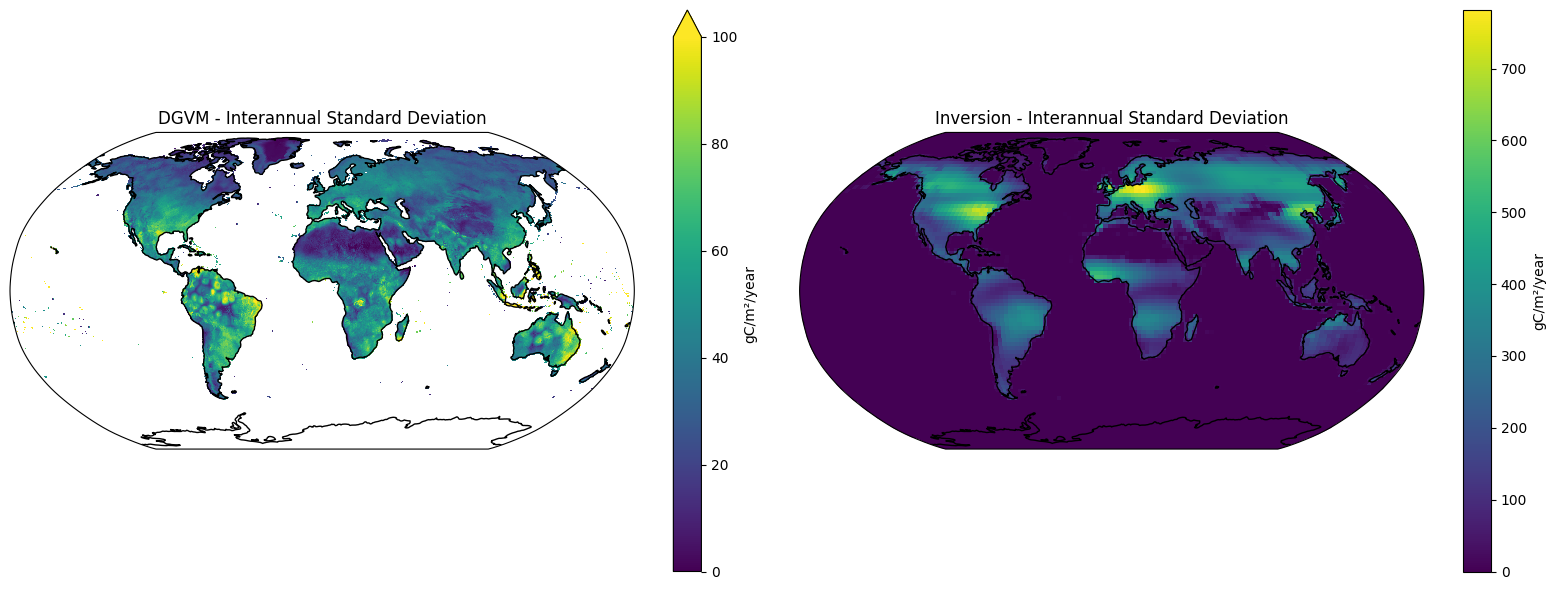

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


dgvm = dgvm_annual
annual_flux_inv = annual_flux

# === Compute STD if not already done ===
nee_std_dgvm = dgvm['NEE'].std(dim='time')         # [lat, lon]
nee_std_inv = annual_flux_inv.std(dim='myear2')    # [lat, lon]

# === Choose manual scale for DGVM ===
vmin_dgvm, vmax_dgvm = 0, 100  # Adjust as you like

# === Plotting ===
fig, axs = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={'projection': ccrs.Robinson()})

# DGVM STD map with fixed scale
nee_std_dgvm.plot(ax=axs[0], transform=ccrs.PlateCarree(), cmap='viridis',
                  vmin=vmin_dgvm, vmax=vmax_dgvm,
                  cbar_kwargs={'label': 'gC/m²/year'})
axs[0].set_title('DGVM - Interannual Standard Deviation')
axs[0].coastlines()

# Inversion STD map
nee_std_inv.plot(ax=axs[1], transform=ccrs.PlateCarree(), cmap='viridis',
                 cbar_kwargs={'label': 'gC/m²/year'})
axs[1].set_title('Inversion - Interannual Standard Deviation')
axs[1].coastlines()

plt.tight_layout()
plt.show()

In [ ]:

dgvm_on_inv_grid = dgvm_monthly.interp(
    lat=inv['lat'],
    lon=inv['lon'],
    method='linear'
)


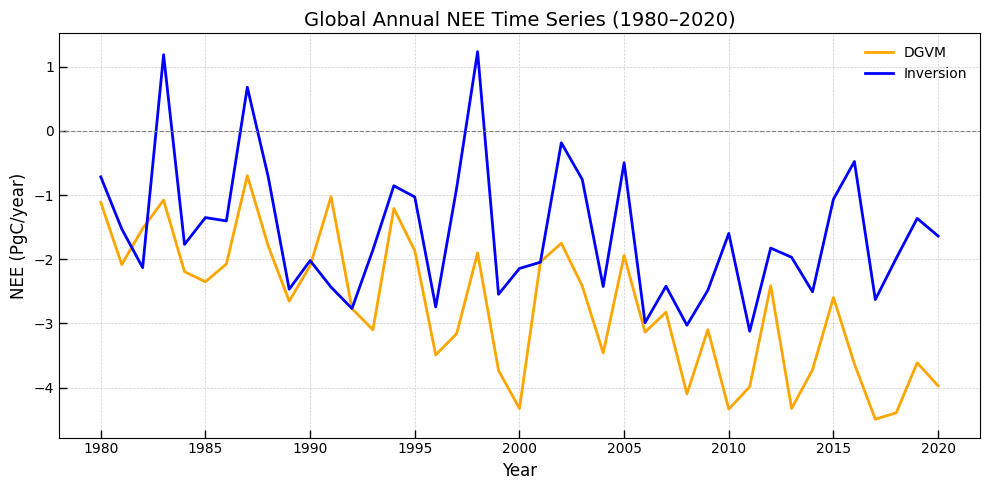

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Assume lat is 1D
lat_radians = np.deg2rad(dgvm_annual['lat'])
earth_radius = 6.371e6  # meters
dlat = np.abs(dgvm_annual['lat'][1] - dgvm_annual['lat'][0])
dlon = np.abs(dgvm_annual['lon'][1] - dgvm_annual['lon'][0])

# Area per grid cell (m²) using spherical Earth approximation
gridcell_area = (
    (earth_radius**2) * np.deg2rad(dlon) *
    (np.sin(np.deg2rad(dgvm_annual['lat'] + dlat / 2)) -
     np.sin(np.deg2rad(dgvm_annual['lat'] - dlat / 2)))
)
gridcell_area = xr.DataArray(gridcell_area, coords=[dgvm_annual['lat']], dims=["lat"])
gridcell_area = gridcell_area.expand_dims(lon=dgvm_annual['lon'])

# Multiply by area → gC/year
global_flux_dgvm = -(dgvm_annual['NEE'] * gridcell_area).sum(dim=['lat', 'lon'])  # gC/year
global_flux_dgvm_pg = global_flux_dgvm / 1e15  # Convert to PgC/year

# Group inversion data by year
annual_flux2 = inv['co2flux_land'].groupby('mtime.year').mean(dim='mtime')
global_flux_inv = annual_flux2.sum(dim=['lat', 'lon'])  # PgC/year

# Select years between 1980 and 2020
global_flux_dgvm_pg = global_flux_dgvm_pg.sel(time=slice(1980, 2020))
global_flux_inv = global_flux_inv.sel(year=slice(1980, 2020))

# Plotting
plt.figure(figsize=(10, 5))

global_flux_dgvm_pg.plot(label='DGVM', color='orange', linewidth=2)
global_flux_inv.plot(label='Inversion', color='blue', linewidth=2)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.ylabel('NEE (PgC/year)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Global Annual NEE Time Series (1980–2020)', fontsize=14)

# Ticks inward
plt.tick_params(direction='in', length=6, width=1, labelsize=10)

# Improve aesthetics
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(frameon=False, fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
pip install regionmask

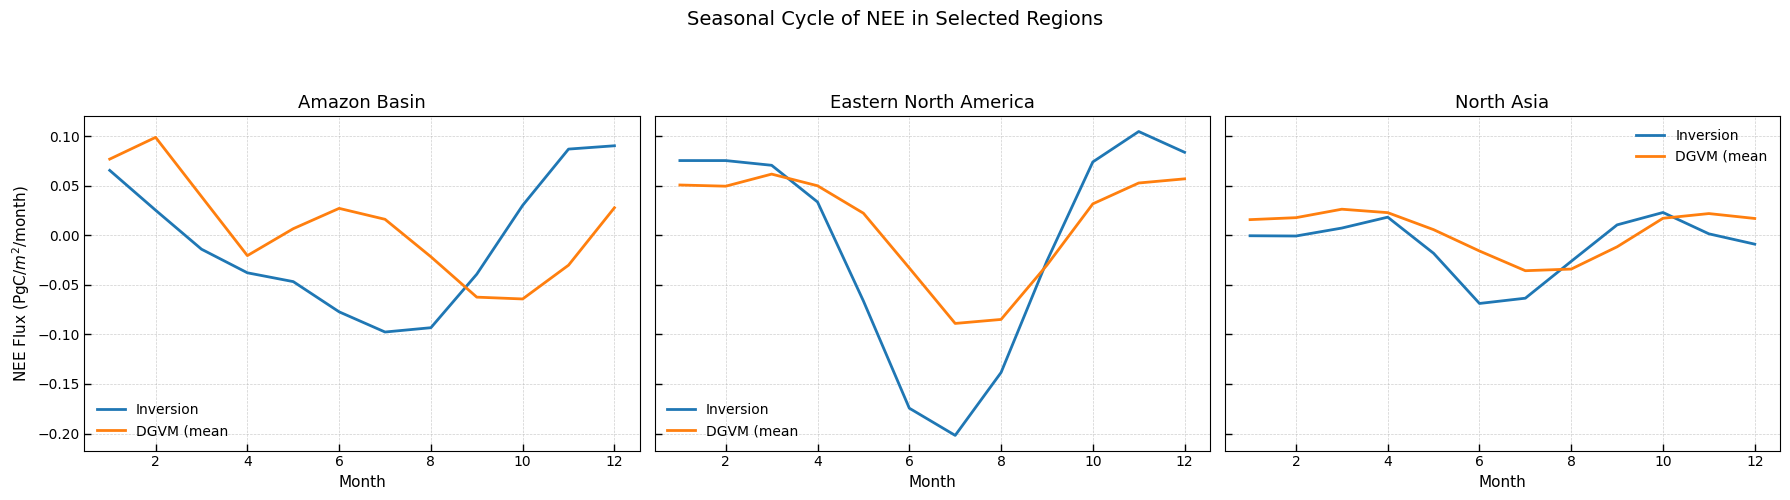

In [ ]:
import numpy as np
import xarray as xr
import regionmask
import matplotlib.pyplot as plt

def calculate_area_coslat(lat, lon):
    """
    Calculate grid cell area using cos(lat) weighting method.
    Returns area in m² for each lat-lon cell.
    """
    R = 6371000  # Earth radius (m)
    delta_lat = abs(lat[1] - lat[0])  # degrees
    delta_lon = abs(lon[1] - lon[0])  # degrees

    dlat_rad = np.deg2rad(delta_lat)
    dlon_rad = np.deg2rad(delta_lon)

    # 2D area using outer product of cos(lat) and lon spacing
    cos_lat = np.cos(np.deg2rad(lat))
    area_per_cell = (R**2) * dlat_rad * dlon_rad * np.outer(cos_lat, np.ones(len(lon)))

    return area_per_cell  # m²

#dgvm = dgvm_monthly
ds = inv
# TransCom regions mask using Giorgi definition
transcom = regionmask.defined_regions.giorgi

lat = ds['lat']
lon = ds['lon']

# Create mask of shape (lat, lon) with region indices or nan
mask = transcom.mask(lon, lat)

# Regions to analyze
regions_idx = [1, 6, 20]  # Amazon, Australia, Western North America
region_names = [transcom.names[i] for i in regions_idx]

# Function to get monthly mean climatology for inversion (PgC/month)
def monthly_climatology_inversion(ds, region_mask, region_id):
    # Filter gridcells for the region
    region_cells = (region_mask == region_id)

    # Select inversion flux and convert PgC/yr per gridcell -> PgC/month per gridcell
    flux = ds['co2flux_land']  # PgC/yr per gridcell
    flux_monthly = flux.groupby('mtime.month').mean(dim='mtime') / 12.0  # PgC/month per gridcell

    # Mask region gridcells
    flux_region = flux_monthly.where(region_cells)

    # Sum total PgC/month over region gridcells
    total_flux = flux_region.sum(dim=['lat', 'lon'])

    # Calculate total area of region (sum of gridcells included)
    # For normalization per m², we need to calculate area sum of these gridcells
    # Here area data is missing, so just keep as total flux for now

    return total_flux

# Function to get monthly mean climatology for DGVM (gC/m²/yr)
def monthly_climatology_dgvm(dgvm, region_mask, region_id):
    """
    Return DGVM monthly climatology as total PgC/month over the region
    """
    flux_monthly = dgvm['NEE']  # gC/m²/month assumed

    # Mask region
    region_cells = (region_mask == region_id)
    flux_region = flux_monthly.where(region_cells)

    # Calculate monthly climatology (average over time)
    monthly_clim = flux_region.groupby('time.month').mean(dim='time')  # gC/m²/month

    # Area weighting
    lat = dgvm['lat'].values
    lon = dgvm['lon'].values
    area = calculate_area_coslat(lat, lon)  # m²
    area_da = xr.DataArray(area, coords={'lat': lat, 'lon': lon}, dims=['lat', 'lon'])
    area_region = area_da.where(region_cells)

    # Convert gC/m²/month → gC/month for each cell
    monthly_gC = monthly_clim * area_region

    # Sum over region to get total gC/month → convert to PgC
    monthly_PgC = monthly_gC.sum(dim=['lat', 'lon']) / 1e15

    return monthly_PgC  # dims: month


# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, region_id in enumerate(regions_idx):
    # Inversion monthly climatology (PgC/month total flux over region)
    inv_monthly = monthly_climatology_inversion(ds, mask, region_id)

    # DGVM monthly climatology (PgC/m²/month spatial mean flux)
    dgvm_mon = monthly_climatology_dgvm(dgvm_on_inv_grid, mask, region_id)

    ax = axes[i]
    inv_monthly.plot(ax=ax, label='Inversion', linewidth=2)
    dgvm_mon.plot(ax=ax, label='DGVM (mean', linewidth=2)

    ax.set_title(region_names[i], fontsize=13)
    ax.set_xlabel('Month', fontsize=11)
    if i == 0:
        ax.set_ylabel('NEE Flux (PgC/$m^{2}$/month)', fontsize=11)

    ax.tick_params(direction='in', length=5, width=1, labelsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    ax.legend(frameon=False, fontsize=10)

# Super title and layout
plt.suptitle('Seasonal Cycle of NEE in Selected Regions', fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import regionmask

transcom = regionmask.defined_regions.giorgi

for i, name in enumerate(transcom.names):
    print(f"{i}: {name}")

0: Australia
1: Amazon Basin
2: Southern South America
3: Central America
4: Western North America
5: Central North America
6: Eastern North America
7: Alaska
8: Greenland
9: Mediterranean Basin
10: Northern Europe
11: Western Africa
12: Eastern Africa
13: Southern Africa
14: Sahara
15: Southeast Asia
16: East Asia
17: South Asia
18: Central Asia
19: Tibet
20: North Asia


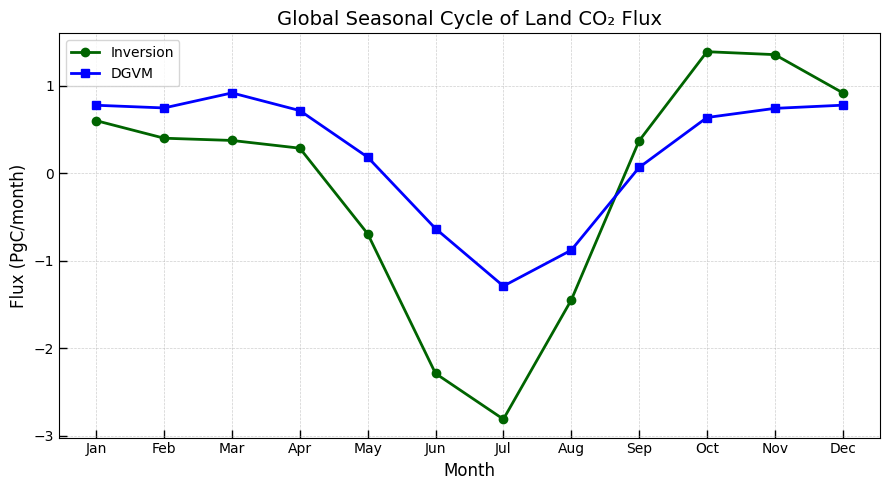

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# ---------------------
# Inversion Climatology
# ---------------------
inv_flux = inv['co2flux_land']  # PgC/year per gridcell
inv_clim = inv_flux.groupby('mtime.month').mean(dim='mtime') / 12.0  # Convert to PgC/month
inv_global = inv_clim.sum(dim=['lat', 'lon'])  # Total PgC/month

# ------------------
# DGVM Climatology
# ------------------
R = 6.371e6  # Earth radius in meters
lat = dgvm_monthly['lat']
lon = dgvm_monthly['lon']
dlat = np.deg2rad(lat.diff('lat').mean().item())
dlon = np.deg2rad(lon.diff('lon').mean().item())

# Compute area per lat and expand
lat_rad = np.deg2rad(lat)
area_per_lat = (R**2) * dlat * dlon * np.cos(lat_rad)
area_2d = area_per_lat.expand_dims(lon=lon).broadcast_like(dgvm_monthly['NEE'].isel(time=0))

# Apply area weights and sum
dgvm_flux_weighted = dgvm_monthly['NEE'] * area_2d  # gC/month
dgvm_total_gC = dgvm_flux_weighted.sum(dim=['lat', 'lon'])  # gC/month
dgvm_total_PgC = dgvm_total_gC / 1e15  # PgC/month

# Monthly climatology
dgvm_clim = dgvm_total_PgC.groupby('time.month').mean('time')

# --------------
# Plot Together - Improved Aesthetics
plt.figure(figsize=(9, 5))

inv_global.plot(marker='o', label='Inversion', color='darkgreen', linewidth=2)
dgvm_clim.plot(marker='s', label='DGVM', color='blue', linewidth=2)

# Axis labels and title
plt.title('Global Seasonal Cycle of Land CO₂ Flux', fontsize=14)
plt.ylabel('Flux (PgC/month)', fontsize=12)
plt.xlabel('Month', fontsize=12)

# X-axis ticks as month names
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    fontsize=10
)

# Tick direction inward
plt.tick_params(direction='in', length=6, width=1, labelsize=10)

# Grid styling
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Legend
plt.legend()

plt.tight_layout()
plt.show()


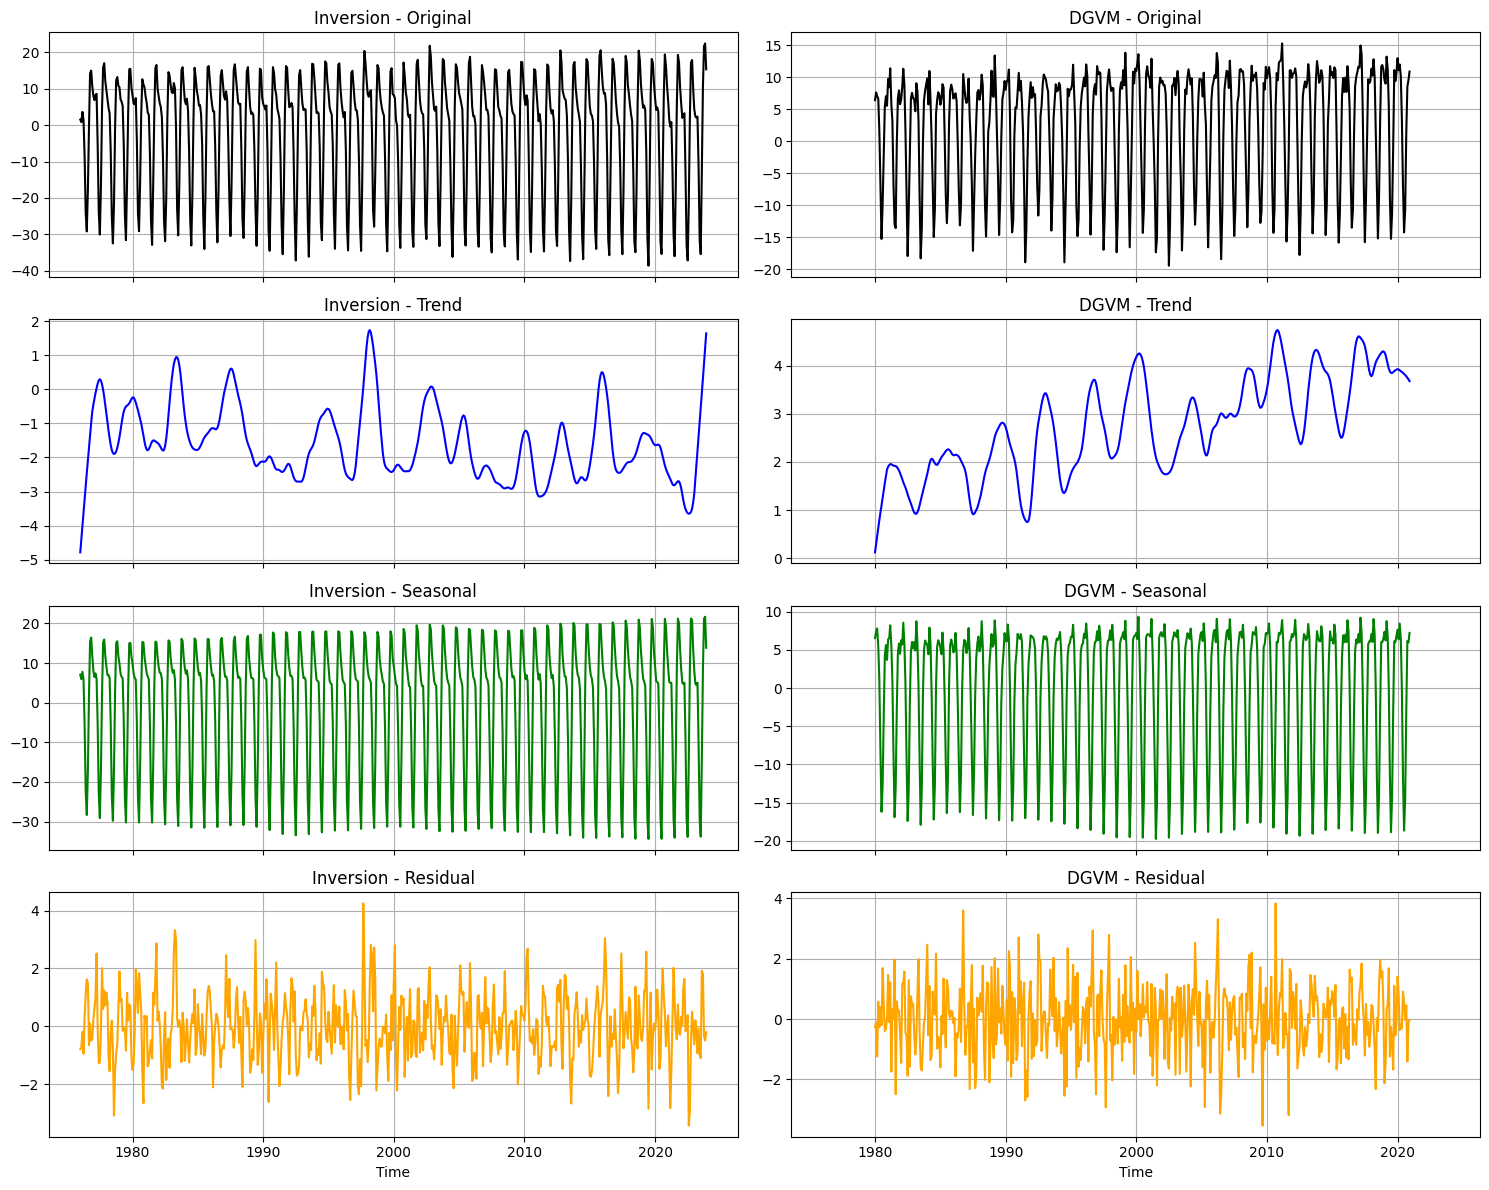

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# 1. Aggregate inversion to monthly resolution by averaging daily values within each month
# (Units remain PgC/year per gridcell)
inv_monthly = inv['co2flux_land'].groupby('mtime.month').mean(dim='mtime')

# Alternatively, if you want a proper monthly time dimension (datetime),
# you can do this instead if 'mtime' is a datetime-like coordinate:
inv_monthly_full = inv['co2flux_land'].resample(mtime='1MS').mean()

# Sum over lat/lon to get global total monthly flux (PgC/year, monthly averaged)
inv_global_monthly = inv_monthly_full.sum(dim=['lat', 'lon'])

# 2. DGVM monthly global flux (already monthly resolution)

# Calculate DGVM global monthly flux weighted by area as before
R = 6.371e6  # Earth radius in meters
lat = dgvm_monthly['lat']
lon = dgvm_monthly['lon']
dlat = np.deg2rad(lat.diff('lat').mean().item())
dlon = np.deg2rad(lon.diff('lon').mean().item())
lat_rad = np.deg2rad(lat)
area_per_lat = (R**2) * dlat * dlon * np.cos(lat_rad)
area_2d = area_per_lat.expand_dims(lon=lon).broadcast_like(dgvm_monthly['NEE'].isel(time=0))

# Multiply each gridcell NEE (gC/m²/month) by area (m²) → gC/month per gridcell
nee_area_weighted = dgvm_monthly['NEE'] * area_2d

# Sum over lat/lon → total global gC/month
global_nee_gC = nee_area_weighted.sum(dim=['lat', 'lon'])

# Convert gC/month to PgC/month
global_nee_PgC = global_nee_gC * 12 / 1e15



# 3. Prepare STL inputs

# For inversion
net_flux_inv = inv_global_monthly.values  # PgC/year (monthly averaged)
time_inv = inv_global_monthly['mtime'].values

# For DGVM
net_flux_dgvm = global_nee_PgC.values  # PgC/year
time_dgvm = global_nee_PgC['time'].values

# 4. Run STL decomposition (period=12 for monthly seasonality)

stl_inv = STL(net_flux_inv, period=12, seasonal=7)
result_inv = stl_inv.fit()

stl_dgvm = STL(net_flux_dgvm, period=12, seasonal=7)
result_dgvm = stl_dgvm.fit()

# 5. Plot results side by side

fig, axes = plt.subplots(4, 2, figsize=(15, 12), sharex=True)

# Titles for the two columns
titles = ['Inversion', 'DGVM']

for col, (result, time, label) in enumerate(zip([result_inv, result_dgvm], [time_inv, time_dgvm], titles)):
    axes[0, col].plot(time, result.observed, label='Original', color='black')
    axes[0, col].set_title(f'{label} - Original')
    axes[0, col].grid(True)

    axes[1, col].plot(time, result.trend, label='Trend', color='blue')
    axes[1, col].set_title(f'{label} - Trend')
    axes[1, col].grid(True)

    axes[2, col].plot(time, result.seasonal, label='Seasonal', color='green')
    axes[2, col].set_title(f'{label} - Seasonal')
    axes[2, col].grid(True)

    axes[3, col].plot(time, result.resid, label='Residual', color='orange')
    axes[3, col].set_title(f'{label} - Residual')
    axes[3, col].grid(True)
    axes[3, col].set_xlabel('Time')

plt.tight_layout()
plt.show()




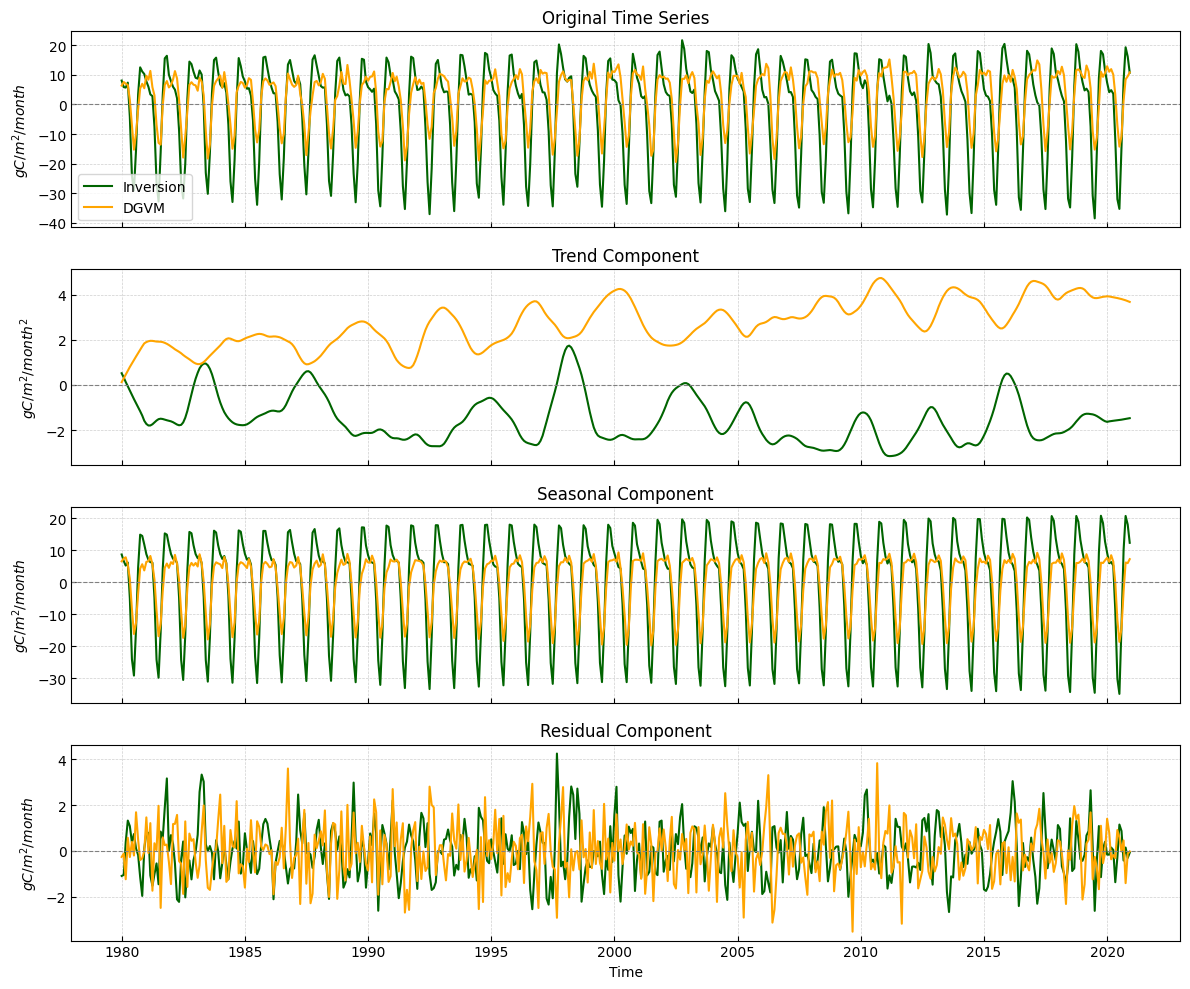

In [ ]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# Slice datasets to 1980–2020
inv_cut = inv_global_monthly.sel(mtime=slice('1980', '2020'))
dgvm_cut = global_nee_PgC.sel(time=slice('1980', '2020'))

# Apply STL decomposition (monthly data, so period=12)
stl_inv = STL(inv_cut.values, period=12, seasonal=7).fit()
stl_dgvm = STL(dgvm_cut.values, period=12, seasonal=7).fit()

# Extract time
time_inv = inv_cut['mtime'].values
time_dgvm = dgvm_cut['time'].values
# Simple and Clean STL Decomposition Plot
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot: Original Time Series
axes[0].plot(time_inv, inv_cut, label='Inversion', color='darkgreen')
axes[0].plot(time_dgvm, dgvm_cut, label='DGVM', color='orange')
axes[0].set_title('Original Time Series')
axes[0].set_ylabel('$gC/m^2/month$')
axes[0].legend()
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
axes[0].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axes[0].tick_params(direction='in')

# Plot: Trend
axes[1].plot(time_inv, stl_inv.trend, label='Inversion', color='darkgreen')
axes[1].plot(time_dgvm, stl_dgvm.trend, label='DGVM', color='orange')
axes[1].set_title('Trend Component')
axes[1].set_ylabel('$gC/m^2/month^2$')
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
axes[1].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axes[1].tick_params(direction='in')

# Plot: Seasonal
axes[2].plot(time_inv, stl_inv.seasonal, label='Inversion', color='darkgreen')
axes[2].plot(time_dgvm, stl_dgvm.seasonal, label='DGVM', color='orange')
axes[2].set_title('Seasonal Component')
axes[2].set_ylabel('$gC/m^2/month$')
axes[2].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
axes[2].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axes[2].tick_params(direction='in')

# Plot: Residual
axes[3].plot(time_inv, stl_inv.resid, label='Inversion', color='darkgreen')
axes[3].plot(time_dgvm, stl_dgvm.resid, label='DGVM', color='orange')
axes[3].set_title('Residual Component')
axes[3].set_ylabel('$gC/m^2/month$')
axes[3].set_xlabel('Time')
axes[3].grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
axes[3].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axes[3].tick_params(direction='in')

plt.tight_layout()
plt.show()


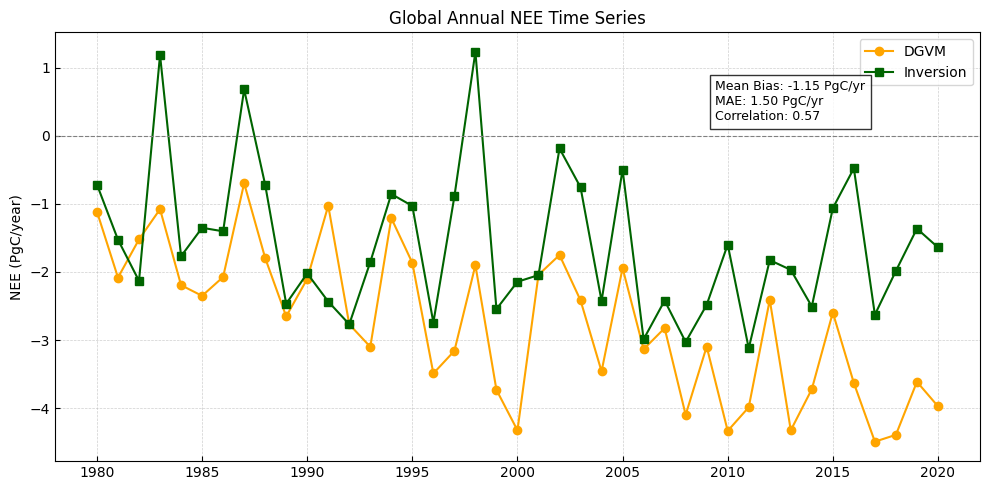

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# ---- Area-weighted DGVM flux (PgC/year) ----
lat_radians = np.deg2rad(dgvm_annual['lat'])
earth_radius = 6.371e6  # meters
dlat = np.abs(dgvm_annual['lat'][1] - dgvm_annual['lat'][0])
dlon = np.abs(dgvm_annual['lon'][1] - dgvm_annual['lon'][0])

gridcell_area = (
    (earth_radius**2) * np.deg2rad(dlon) *
    (np.sin(np.deg2rad(dgvm_annual['lat'] + dlat / 2)) -
     np.sin(np.deg2rad(dgvm_annual['lat'] - dlat / 2)))
)
gridcell_area = xr.DataArray(gridcell_area, coords=[dgvm_annual['lat']], dims=["lat"])
gridcell_area = gridcell_area.expand_dims(lon=dgvm_annual['lon'])

global_flux_dgvm_pg = -(dgvm_annual['NEE'] * gridcell_area).sum(dim=['lat', 'lon']) / 1e15  # gC→PgC

# ---- Inversion annual flux (PgC/year) ----
annual_flux_inv = inv['co2flux_land'].groupby('mtime.year').mean(dim='mtime')
global_flux_inv = annual_flux_inv.sum(dim=['lat', 'lon'])  # PgC/year

# ---- Align both time series by overlapping years ----
dgvm_years = global_flux_dgvm_pg['time'].values
inv_years = global_flux_inv['year'].values
common_years = np.intersect1d(dgvm_years, inv_years)

dgvm_flux = global_flux_dgvm_pg.sel(time=common_years)
inv_flux = global_flux_inv.sel(year=common_years)

# ---- Compute metrics ----
bias = float((dgvm_flux - inv_flux).mean())
mae = float(np.abs(dgvm_flux - inv_flux).mean())
r, _ = pearsonr(dgvm_flux.values, inv_flux.values)

# ---- Simplified, Clean Plot ----
plt.figure(figsize=(10, 5))

plt.plot(common_years, dgvm_flux, label='DGVM', color='orange', marker='o')
plt.plot(common_years, inv_flux, label='Inversion', color='darkgreen', marker='s')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.ylabel('NEE (PgC/year)')
plt.title('Global Annual NEE Time Series')

# Metrics box
textstr = f"Mean Bias: {bias:.2f} PgC/yr\nMAE: {mae:.2f} PgC/yr\nCorrelation: {r:.2f}"
plt.gcf().text(0.72, 0.75, textstr, fontsize=9, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tick_params(direction='in')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Interpolate DGVM to match inversion grid (lat/lon)
dgvm_flux_on_inv_grid = dgvm_flux_pg.interp(
    lat=inv['lat'],
    lon=inv['lon'],
    method='linear'
)

# Align years between the two datasets
common_years = np.intersect1d(inv_annual['year'], dgvm_flux_on_inv_grid['time'])
inv_flux = inv_annual.sel(year=common_years)
dgvm_flux = dgvm_flux_on_inv_grid.sel(time=common_years)

# Time mean over years
mean_inv = inv_flux.mean(dim='year')
mean_dgvm = dgvm_flux.mean(dim='time')

# Bias map: DGVM - Inversion
bias_map = mean_dgvm - mean_inv



NameError: name 'dgvm_flux_pg' is not defined

In [ ]:
print(bias_map.dims)
print(bias_map.shape)


In [ ]:
print("🔍 DGVM Grid (Original):")
print(f"  lat: shape = {dgvm_annual['lat'].shape}, range = ({dgvm_annual['lat'].min().item()}, {dgvm_annual['lat'].max().item()})")
print(f"  lon: shape = {dgvm_annual['lon'].shape}, range = ({dgvm_annual['lon'].min().item()}, {dgvm_annual['lon'].max().item()})")
print()

print("🔁 Interpolated DGVM Grid (onto Inversion):")
print(f"  lat: shape = {dgvm_flux_on_inv_grid['lat'].shape}, range = ({dgvm_flux_on_inv_grid['lat'].min().item()}, {dgvm_flux_on_inv_grid['lat'].max().item()})")
print(f"  lon: shape = {dgvm_flux_on_inv_grid['lon'].shape}, range = ({dgvm_flux_on_inv_grid['lon'].min().item()}, {dgvm_flux_on_inv_grid['lon'].max().item()})")
print()

print("📉 Inversion Grid:")
print(f"  lat: shape = {inv_annual['lat'].shape}, range = ({inv_annual['lat'].min().item()}, {inv_annual['lat'].max().item()})")
print(f"  lon: shape = {inv_annual['lon'].shape}, range = ({inv_annual['lon'].min().item()}, {inv_annual['lon'].max().item()})")
print()

# Optional: check for missing values in interpolated result
nan_ratio = float(dgvm_flux_on_inv_grid.isnull().mean().item())
print(f"🧪 Fraction of NaNs in interpolated DGVM grid: {nan_ratio:.2%}")

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 5))
ax = plt.axes(projection=ccrs.Robinson())

# Plotting only if bias_map is valid
bias_plot = bias_map.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=-0.5,
    vmax=0.5,
    cbar_kwargs={'label': 'Mean Bias (PgC/year)'}
)

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.3)
ax.set_title('Mean Bias (DGVM - Inversion) in Annual NEE')
plt.tight_layout()
plt.show()


In [ ]:
import xarray as xr

# Load DGVM interpolated dataset
dgvm_interp = xr.open_dataset('dgvm_interp.nc')

# Print general info
print(dgvm_interp)

# Inspect variable names
print("Variables:", list(dgvm_interp.data_vars))

# Check coordinates and their shapes/ranges
print("Coordinates:")
print(f"lat: shape={dgvm_interp['lat'].shape}, range=({dgvm_interp['lat'].min().item()}, {dgvm_interp['lat'].max().item()})")
print(f"lon: shape={dgvm_interp['lon'].shape}, range=({dgvm_interp['lon'].min().item()}, {dgvm_interp['lon'].max().item()})")

# If there's a time coordinate, check that too
if 'time' in dgvm_interp.coords:
    print(f"time: shape={dgvm_interp['time'].shape}, range=({str(dgvm_interp['time'].min().values)}, {str(dgvm_interp['time'].max().values)})")

# Check a key variable's stats (assuming 'NEE' is the main flux variable)
if 'NEE' in dgvm_interp.data_vars:
    print("NEE stats:")
    print(dgvm_interp['NEE'].isel(time=0).min())
    print(dgvm_interp['NEE'].isel(time=0).max())
    print(dgvm_interp['NEE'].isel(time=0).mean())

# Compare lat/lon coordinates with inversion dataset if available
# (assuming 'inv' is


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load inversion annual data, aggregated to annual means if needed
dgvm_annual = dgvm_interp['NEE']

# Assuming `inv` dataset has 'co2flux_land' variable and 'mtime' time coordinate
inv_annual = inv['co2flux_land'].groupby('mtime.year').mean('mtime')  # PgC/yr
inv_annual = inv_annual.sel(year=slice(2000, 2020))  # subset same years

# Ensure spatial dimensions match (should be if dgvm_interp was regridded)
assert dgvm_annual.lat.shape == inv_annual.lat.shape
assert dgvm_annual.lon.shape == inv_annual.lon.shape

# Align datasets along time dimension (year)
common_years = sorted(set(dgvm_annual.time.values).intersection(inv_annual.year.values))
dgvm_annual_sel = dgvm_annual.sel(time=common_years)
inv_annual_sel = inv_annual.sel(year=common_years)

# Calculate bias at each grid cell and year: DGVM - Inversion
bias = dgvm_annual_sel + inv_annual_sel #change sign because dgvm is negative so inv-dgvm

# Calculate mean bias over all years at each grid cell
mean_bias = bias.mean(dim='time' if 'time' in bias.dims else 'year')
mean_bias_2d = mean_bias.mean(dim='year')

# Plotting mean bias map
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Robinson())
mean_bias_2d.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',
    vmin=-1, vmax=1,  # adjust color scale limits if needed
    cbar_kwargs={'label': 'Mean Annual Bias (PgC/year)'}
)
ax.coastlines()
ax.set_title('Mean Annual Bias of NEE (Inversion - DGVM) 2000-2020')
plt.show()

In [ ]:
print(mean_bias.dims)
print(mean_bias.shape)
